## カーネル密度推定

参考：[カーネル密度推定（KDE: Kernel Density Estimation）をpython (numpy)で実装・整理してみる（Qiita記事）](https://qiita.com/shokishimada/items/f630a20099e8e4bdc2f7)

In [30]:
import numpy as np
import matplotlib.pyplot as plt

#### KDE の定義

In [31]:
def kde(x, sample, sigma, kernel):
    K = len(sample)
    return 1/(K*sigma) * np.sum([kernel((x-sample[i])/sigma) for i in range(K)])

#### カーネルの定義

In [32]:
def gauss_kernel(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

def epanechnikov_kernel(x):
    return (3/4)*(1 - x**2) if abs(x) < 1 else 0

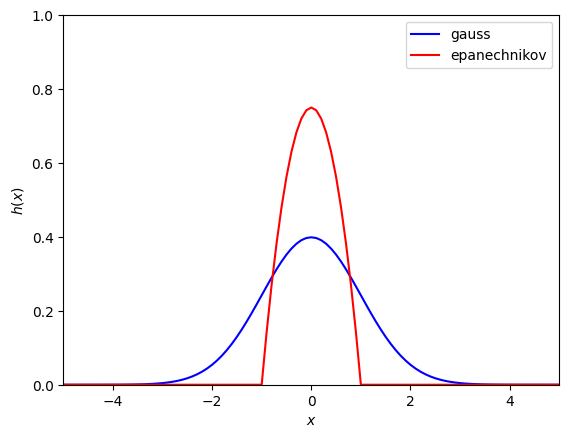

In [33]:
x = np.linspace(-5, 5, 101)
y1 = [gauss_kernel(x) for x in x]
y2 = [epanechnikov_kernel(x) for x in x]

fig, ax = plt.subplots()
ax.plot(x, y1, label="gauss", color="blue")
ax.plot(x, y2, label="epanechnikov", color="red")
ax.set_xlabel('$x$')
ax.set_ylabel('$h(x)$')
ax.set_xlim(-5,5)
ax.set_ylim(0,1)
ax.legend()
plt.show()

#### 異なるカーネルによるKDEの比較

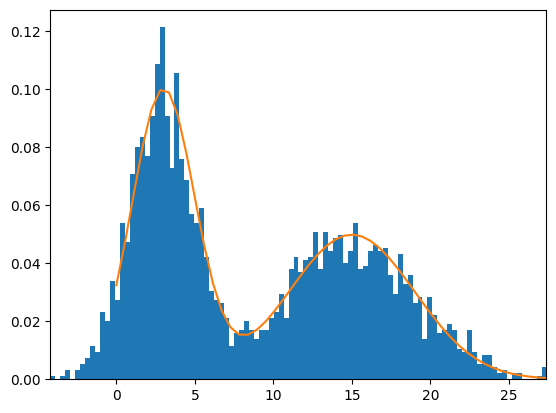

In [40]:
# サンプル点作成

mean1=3.0
mean2=15.0

sigma1=2.0
sigma2=4.0

sample_size=3000

def normal(x,mean,sigma):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-((x-mean)**2/(2*sigma**2)))

sample=[]
for i in range(sample_size):
    idx=np.random.randint(1,3)
    if idx==1:
        sample.append(np.random.normal(loc=mean1,scale=sigma1))
    else:
        sample.append(np.random.normal(loc=mean2,scale=sigma2))
    
sample=sorted(sample)
fig,ax=plt.subplots()
ax.hist(sample,density=True,bins=100)
ax.set_xlim(np.min(sample),np.max(sample))

x=np.linspace(0,np.max(sample))
ax.plot(x,0.5*normal(x,mean1,sigma1)+0.5*normal(x,mean2,sigma2))

In [43]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [56]:
x = np.linspace(0,np.max(sample),200)

def plot_kde(sigma):
    y_gauss = [kde(x[i],sample,sigma,gauss_kernel) for i in range(len(x))]
    y_epanechnikov = [kde(x[i],sample,sigma,epanechnikov_kernel) for i in range(len(x))]
    fig,ax=plt.subplots()
    ax.plot(x,0.5*normal(x,mean1,sigma1)+0.5*normal(x,mean2,sigma2),label='source', color="black")
    ax.plot(x,y_gauss,label='kde(gauss)', color="blue")
    ax.plot(x,y_epanechnikov,label='kde(epanechnikov)', color="red")
    ax.legend()
    plt.show()

slider = widgets.FloatSlider(min=0.5, max=2.5, step=0.5, description="sigma") # バンド幅が小さいほど基底関数がシャープになり、データを過学習したような分布が得られる
widgets.interact(plot_kde, sigma=slider)

interactive(children=(FloatSlider(value=0.5, description='sigma', max=2.5, min=0.5, step=0.5), Output()), _dom…

<function __main__.plot_kde(sigma)>

バンド幅の決め方として、Scottのルールと、Silvermanのルールが知られている。（[SciPyのガウシアンカーネル密度推定に実装されているバンド幅の算出方法について](https://analytics-note.xyz/statistics/scipy-kde-bw-factor/)）

バンド幅 $\sigma$ は、学習したデータの普遍分散 $v$ の平方根に、以下で定義する係数 $f$ を書けたものとなる。
$\sigma = \sqrt{v}*f$

データの件数を $n$、データの次元を $d$ とすると、$f$ は
- Scottのルール: $f = n^{\frac{-1}{d+4}}$
- Silvermanのルール: $f = \left(\frac{d+2}{4}*n \right)^{\frac{-1}{d+4}}$

になる（SilvermanのルールはScottのルールでの $n$ に係数がかかっている）

In [63]:
var = np.var(sample, ddof=1)
sigma_scott = np.sqrt(var)*sample_size**(-1/5)
sigma_silverman = np.sqrt(var)*(3/4*sample_size)**(-1/5)
print("Scottのルール: ", sigma_scott)
print("Silvermanのルール: ", sigma_silverman)

Scottのルール:  1.3871428738909004
Silvermanのルール:  1.4692948029662076


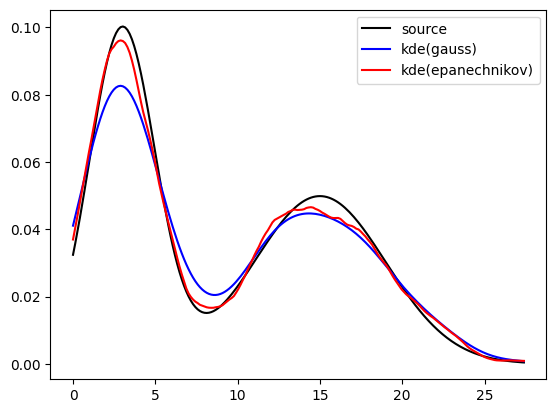

In [64]:
# Scottのルールに従いKDEを行う
plot_kde(sigma_scott)